In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(19, 9)

In [6]:
df_states.shape

(925, 9)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total
14,2020-03-18,56,7731,66225,73956,2538,NaN,112.0,76495
15,2020-03-19,56,11723,89119,100842,3025,NaN,160.0,103867
16,2020-03-20,56,17038,118147,135185,3336,NaN,219.0,138521
17,2020-03-21,56,23324,156639,179963,3477,1974.0,276.0,183440
18,2020-03-22,56,31767,192756,224523,2842,2544.0,394.0,227365


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
32,2020-03-22,NE,48.0,356.0,NaN,NaN,0.0,404,2020-03-22T20:00:00Z
31,2020-03-22,ND,28.0,1260.0,NaN,3.0,0.0,1288,2020-03-22T20:00:00Z
30,2020-03-22,NC,255.0,6183.0,NaN,NaN,0.0,6438,2020-03-22T20:00:00Z
28,2020-03-22,MS,207.0,1114.0,NaN,33.0,1.0,1321,2020-03-22T20:00:00Z
0,2020-03-22,AK,22.0,946.0,NaN,0.0,NaN,968,2020-03-22T20:00:00Z


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate percent of population tested
df_states['test_rate'] = df_states['total'] / df_states['population']

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,state_name,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
892,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-11T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN
893,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,2020-03-10T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,0.0
894,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-09T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN
895,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-08T20:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN
896,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-07T21:00:00Z,Wyoming,56,577737,5.950611,0.0,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
count,897.000000,790.000000,339.000000,27.000000,262.000000,790.000000,897.000000,8.970000e+02,890.000000,8.970000e+02,785.000000,790.000000
mean,126.831661,997.296203,79.436578,167.333333,5.847328,1138.894937,29.342252,6.656528e+06,433.410843,1.538021e-05,0.118257,0.000208
std,701.921454,3145.328073,168.267744,472.302299,14.114460,3804.051000,16.097566,7.462419e+06,1610.689211,4.194809e-05,0.135624,0.000405
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,5.777370e+05,1.291523,0.000000e+00,0.000000,0.000000
25%,2.000000,41.000000,4.500000,3.000000,0.250000,49.000000,16.000000,1.805832e+06,54.955978,6.326902e-07,0.031250,0.000014
50%,14.000000,142.000000,20.000000,32.000000,1.000000,180.500000,29.000000,4.659978e+06,109.860468,3.876330e-06,0.083333,0.000047
75%,64.000000,588.250000,68.000000,59.500000,4.000000,695.250000,42.000000,7.535591e+06,229.511156,1.482999e-05,0.150442,0.000209
max,15168.000000,46233.000000,1026.000000,1974.000000,114.000000,61401.000000,72.000000,3.955704e+07,11490.119540,7.761661e-04,0.854083,0.003599


# United States Positive Cases

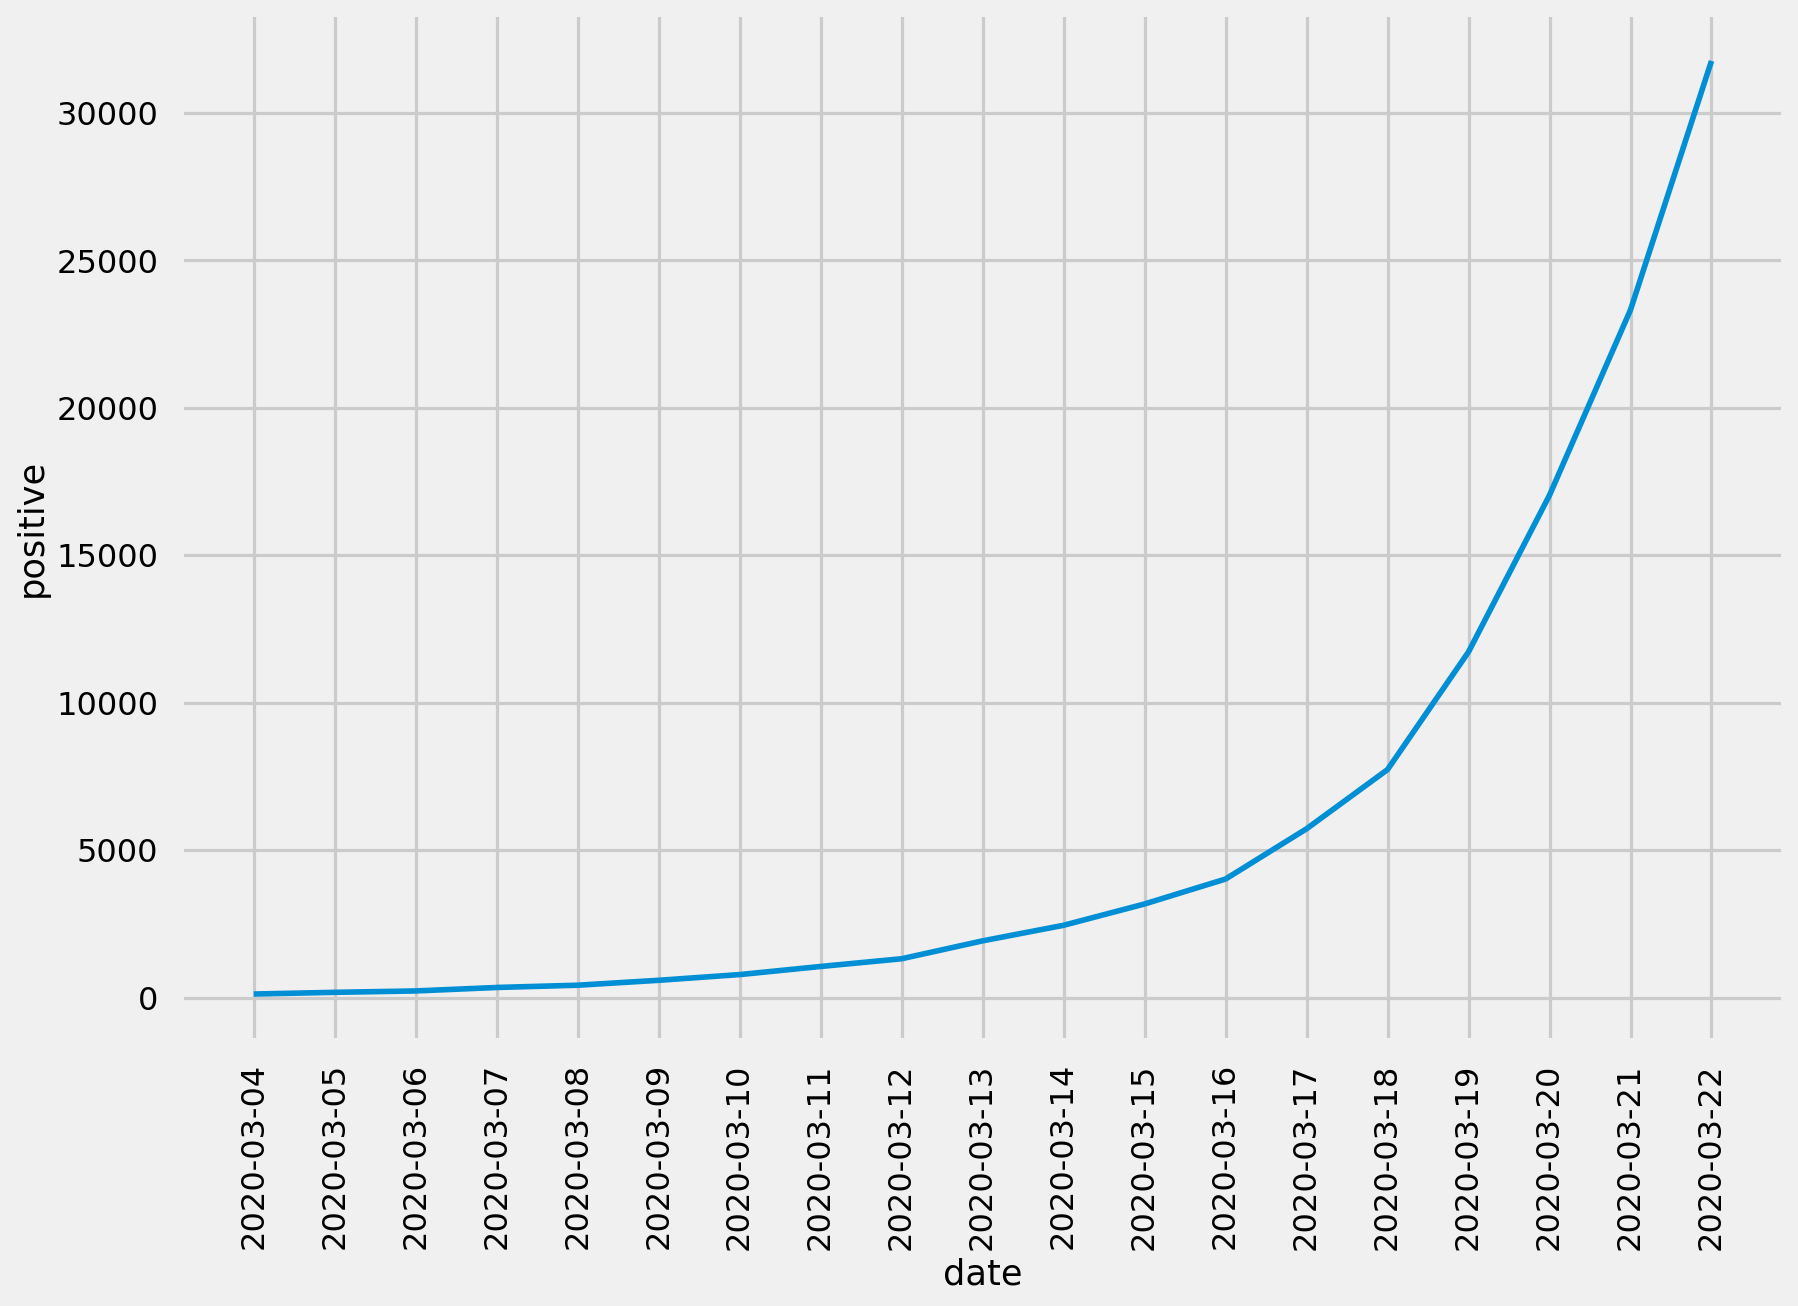

In [14]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

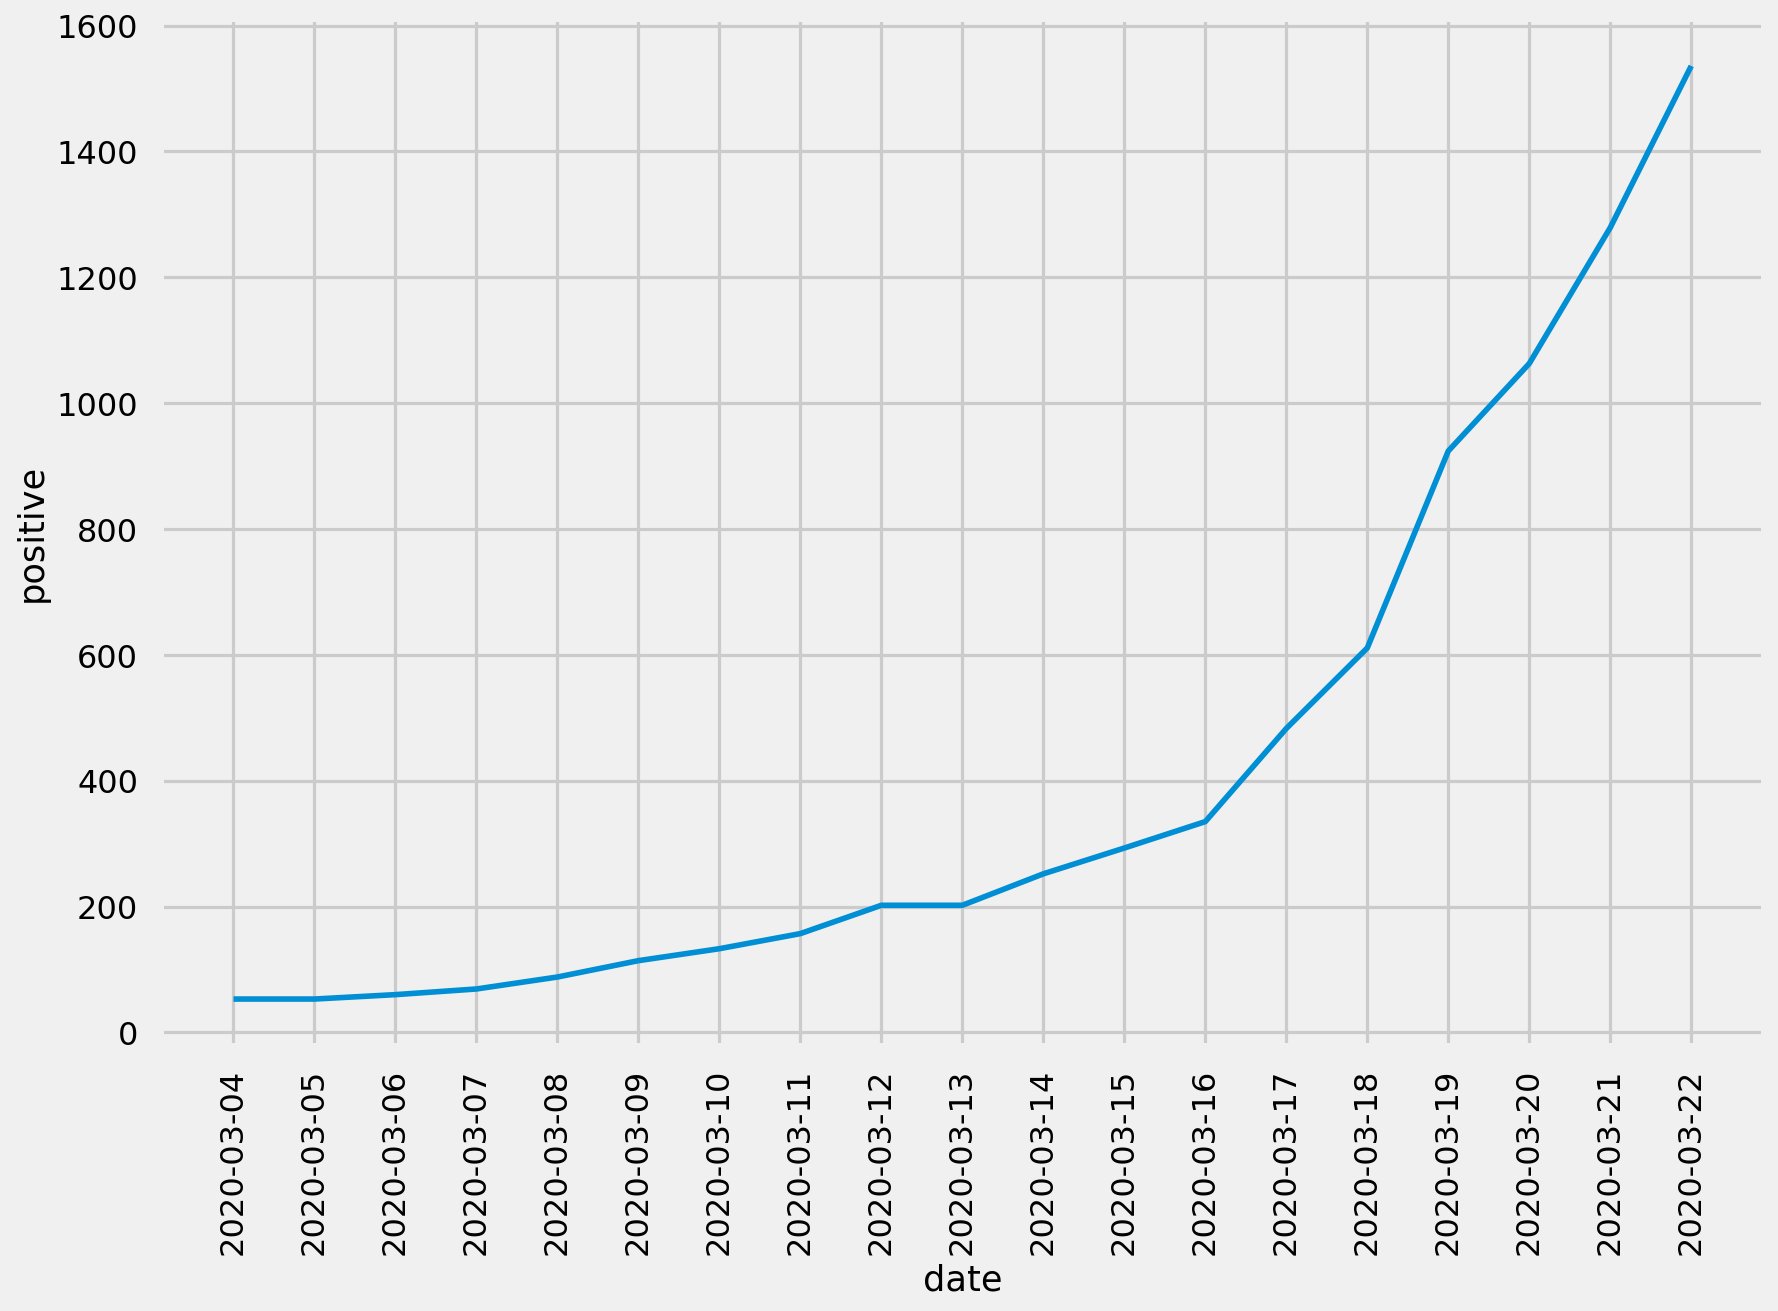

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

## Positive and Total Tests

## California

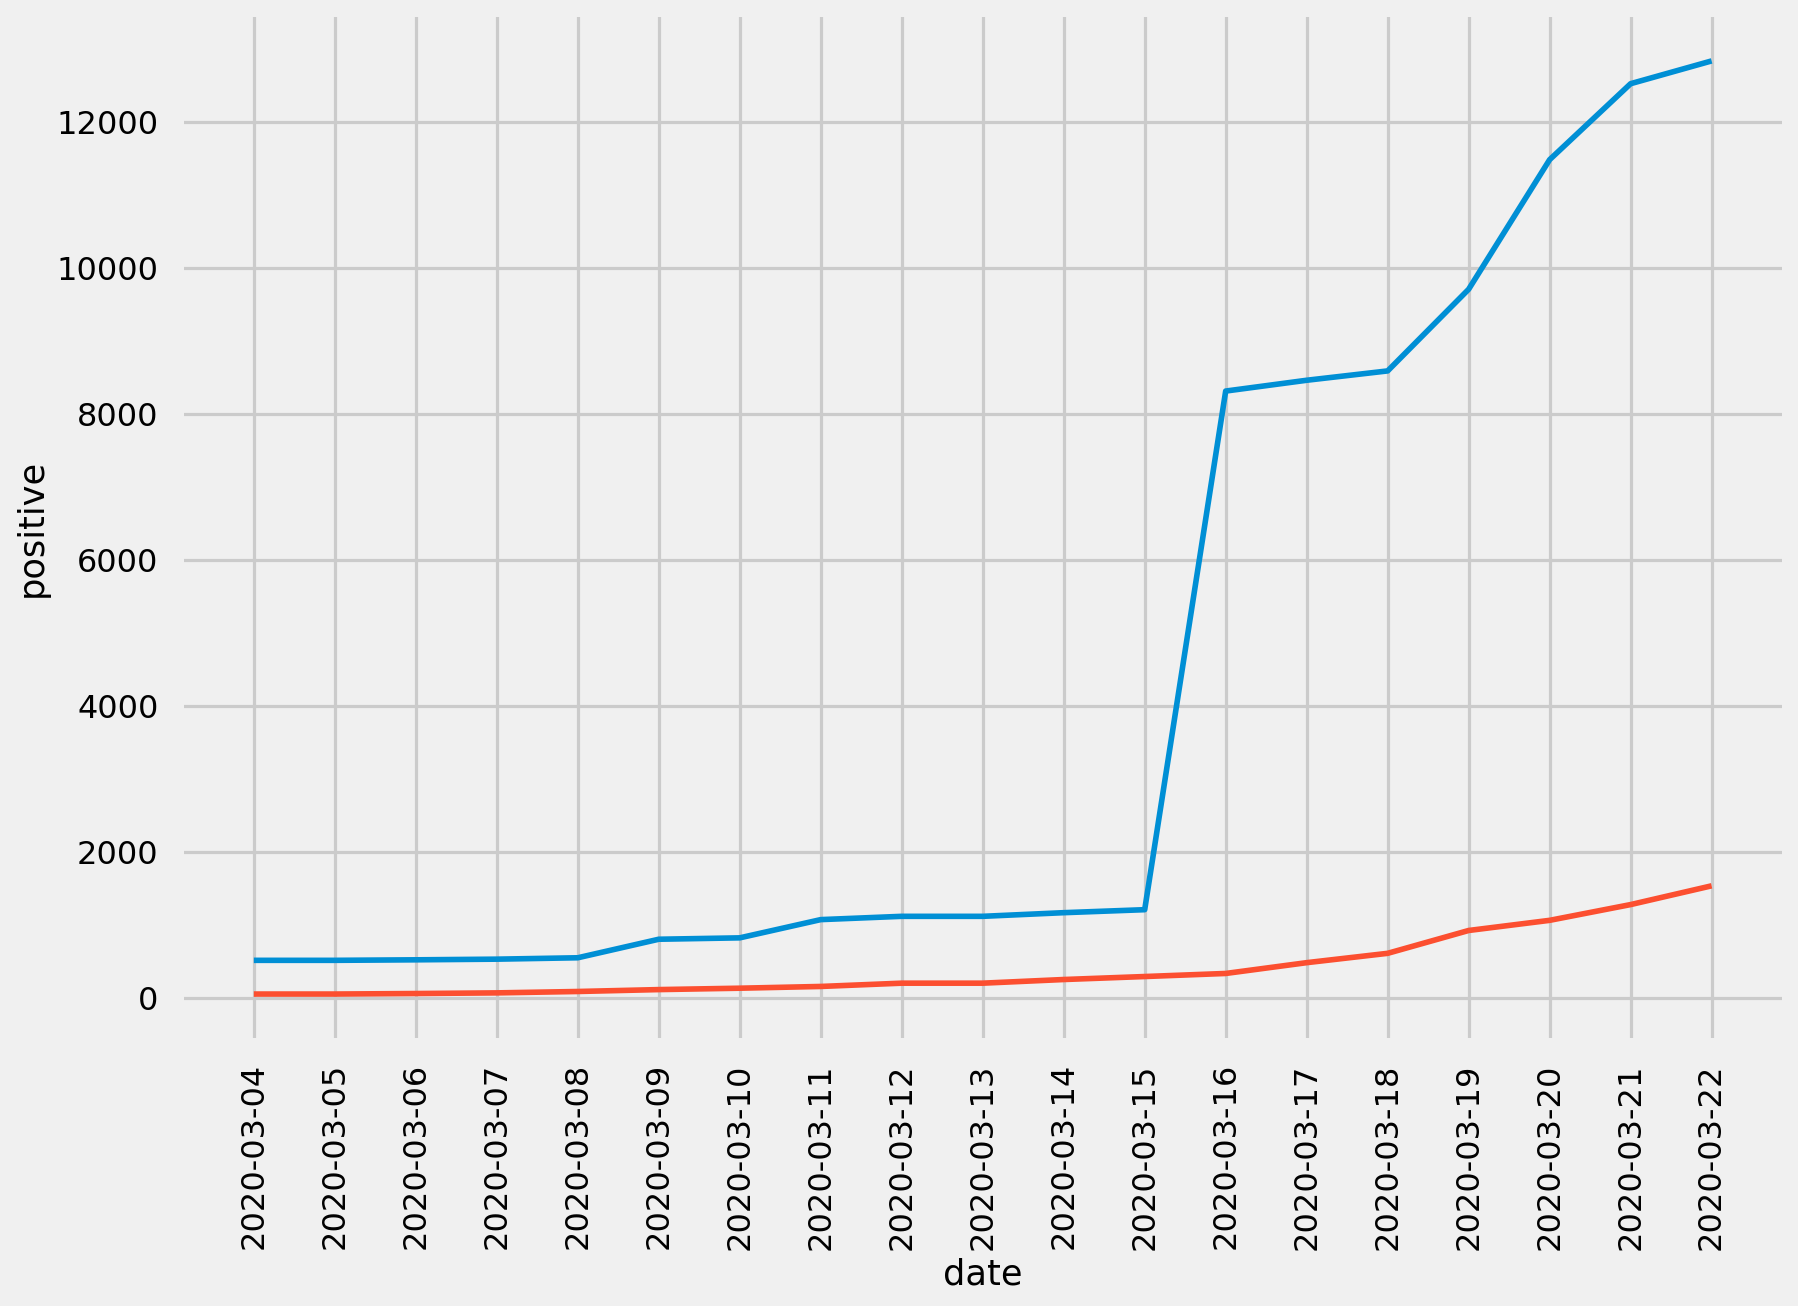

In [16]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

## New York

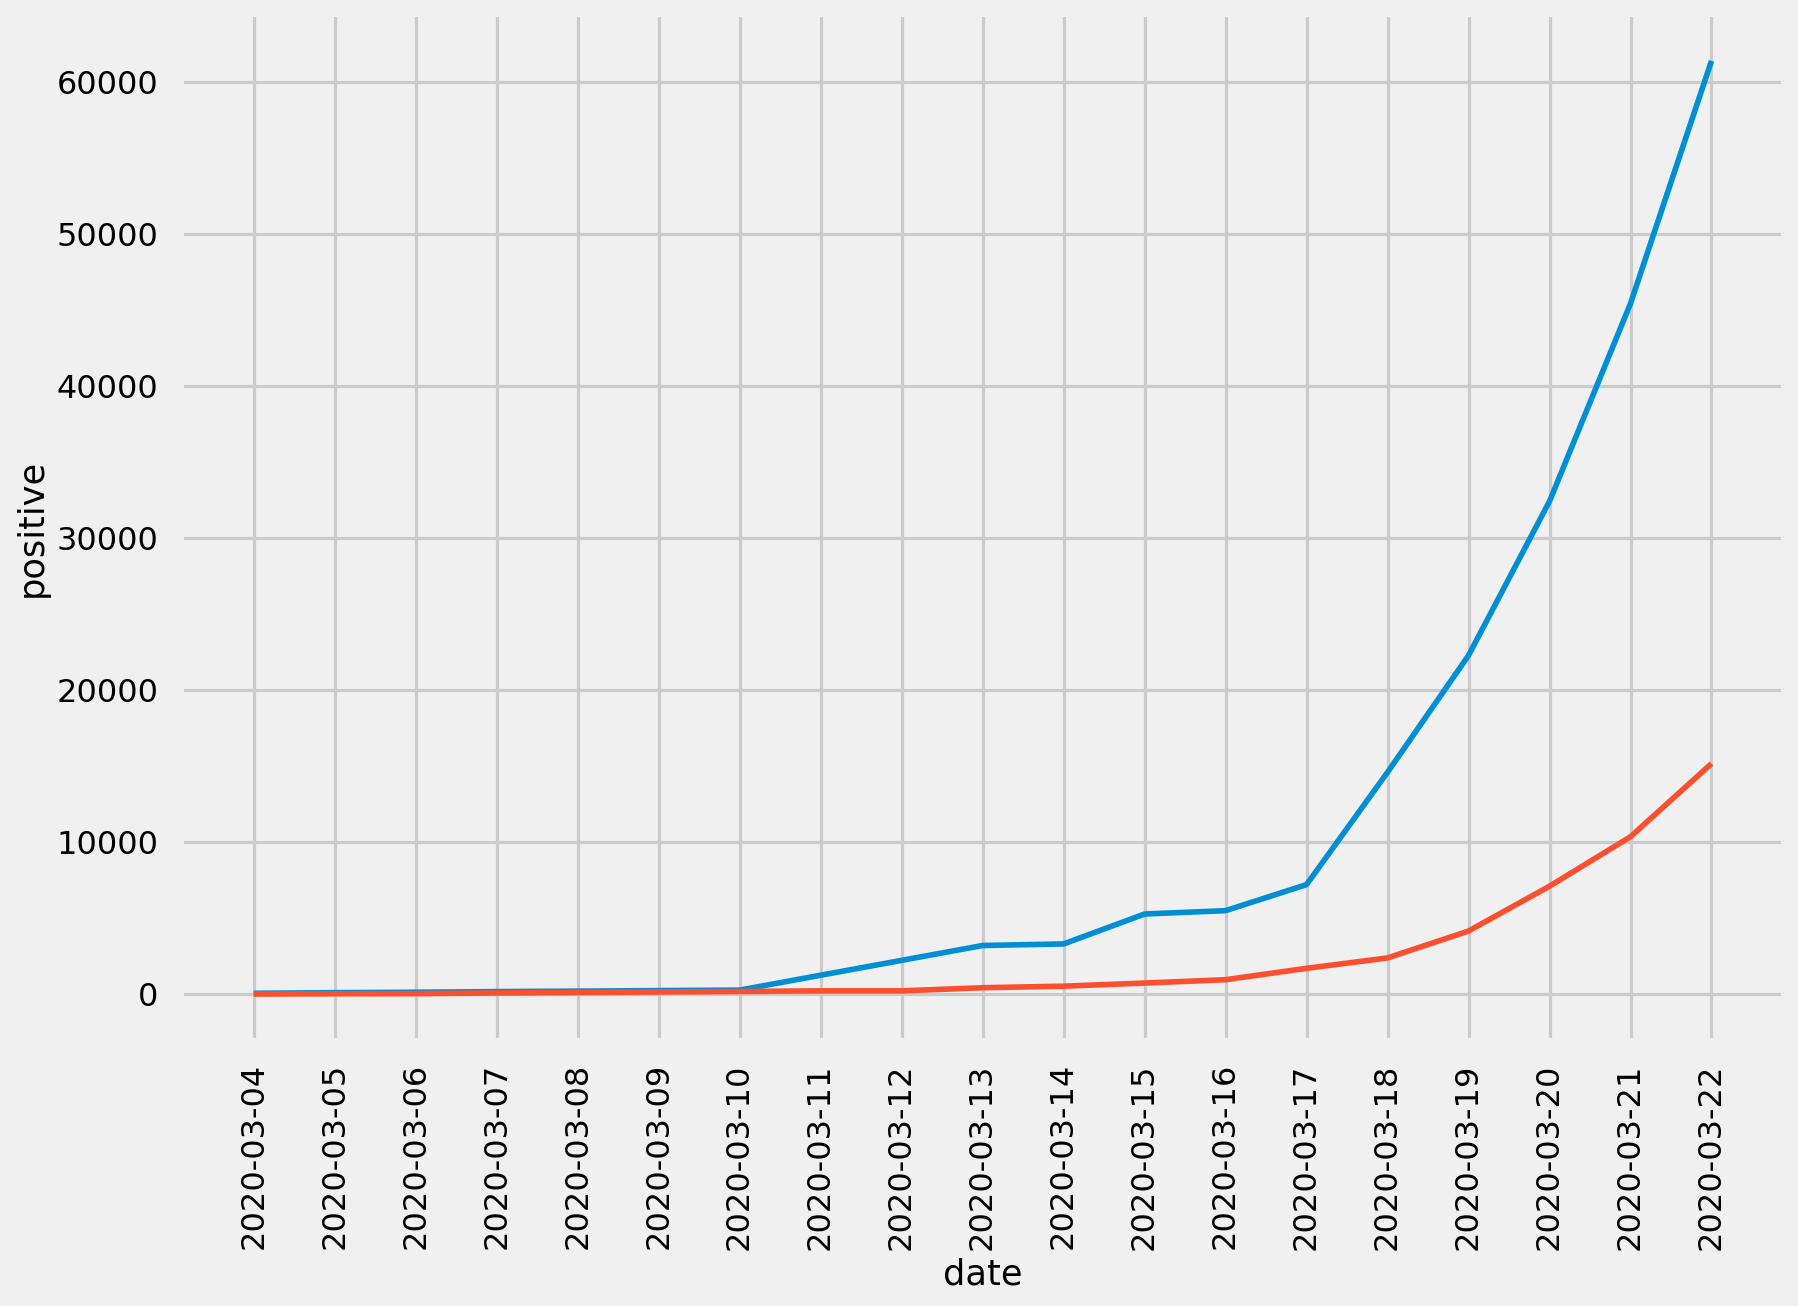

In [17]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
plt.show()

# All States Positive Cases

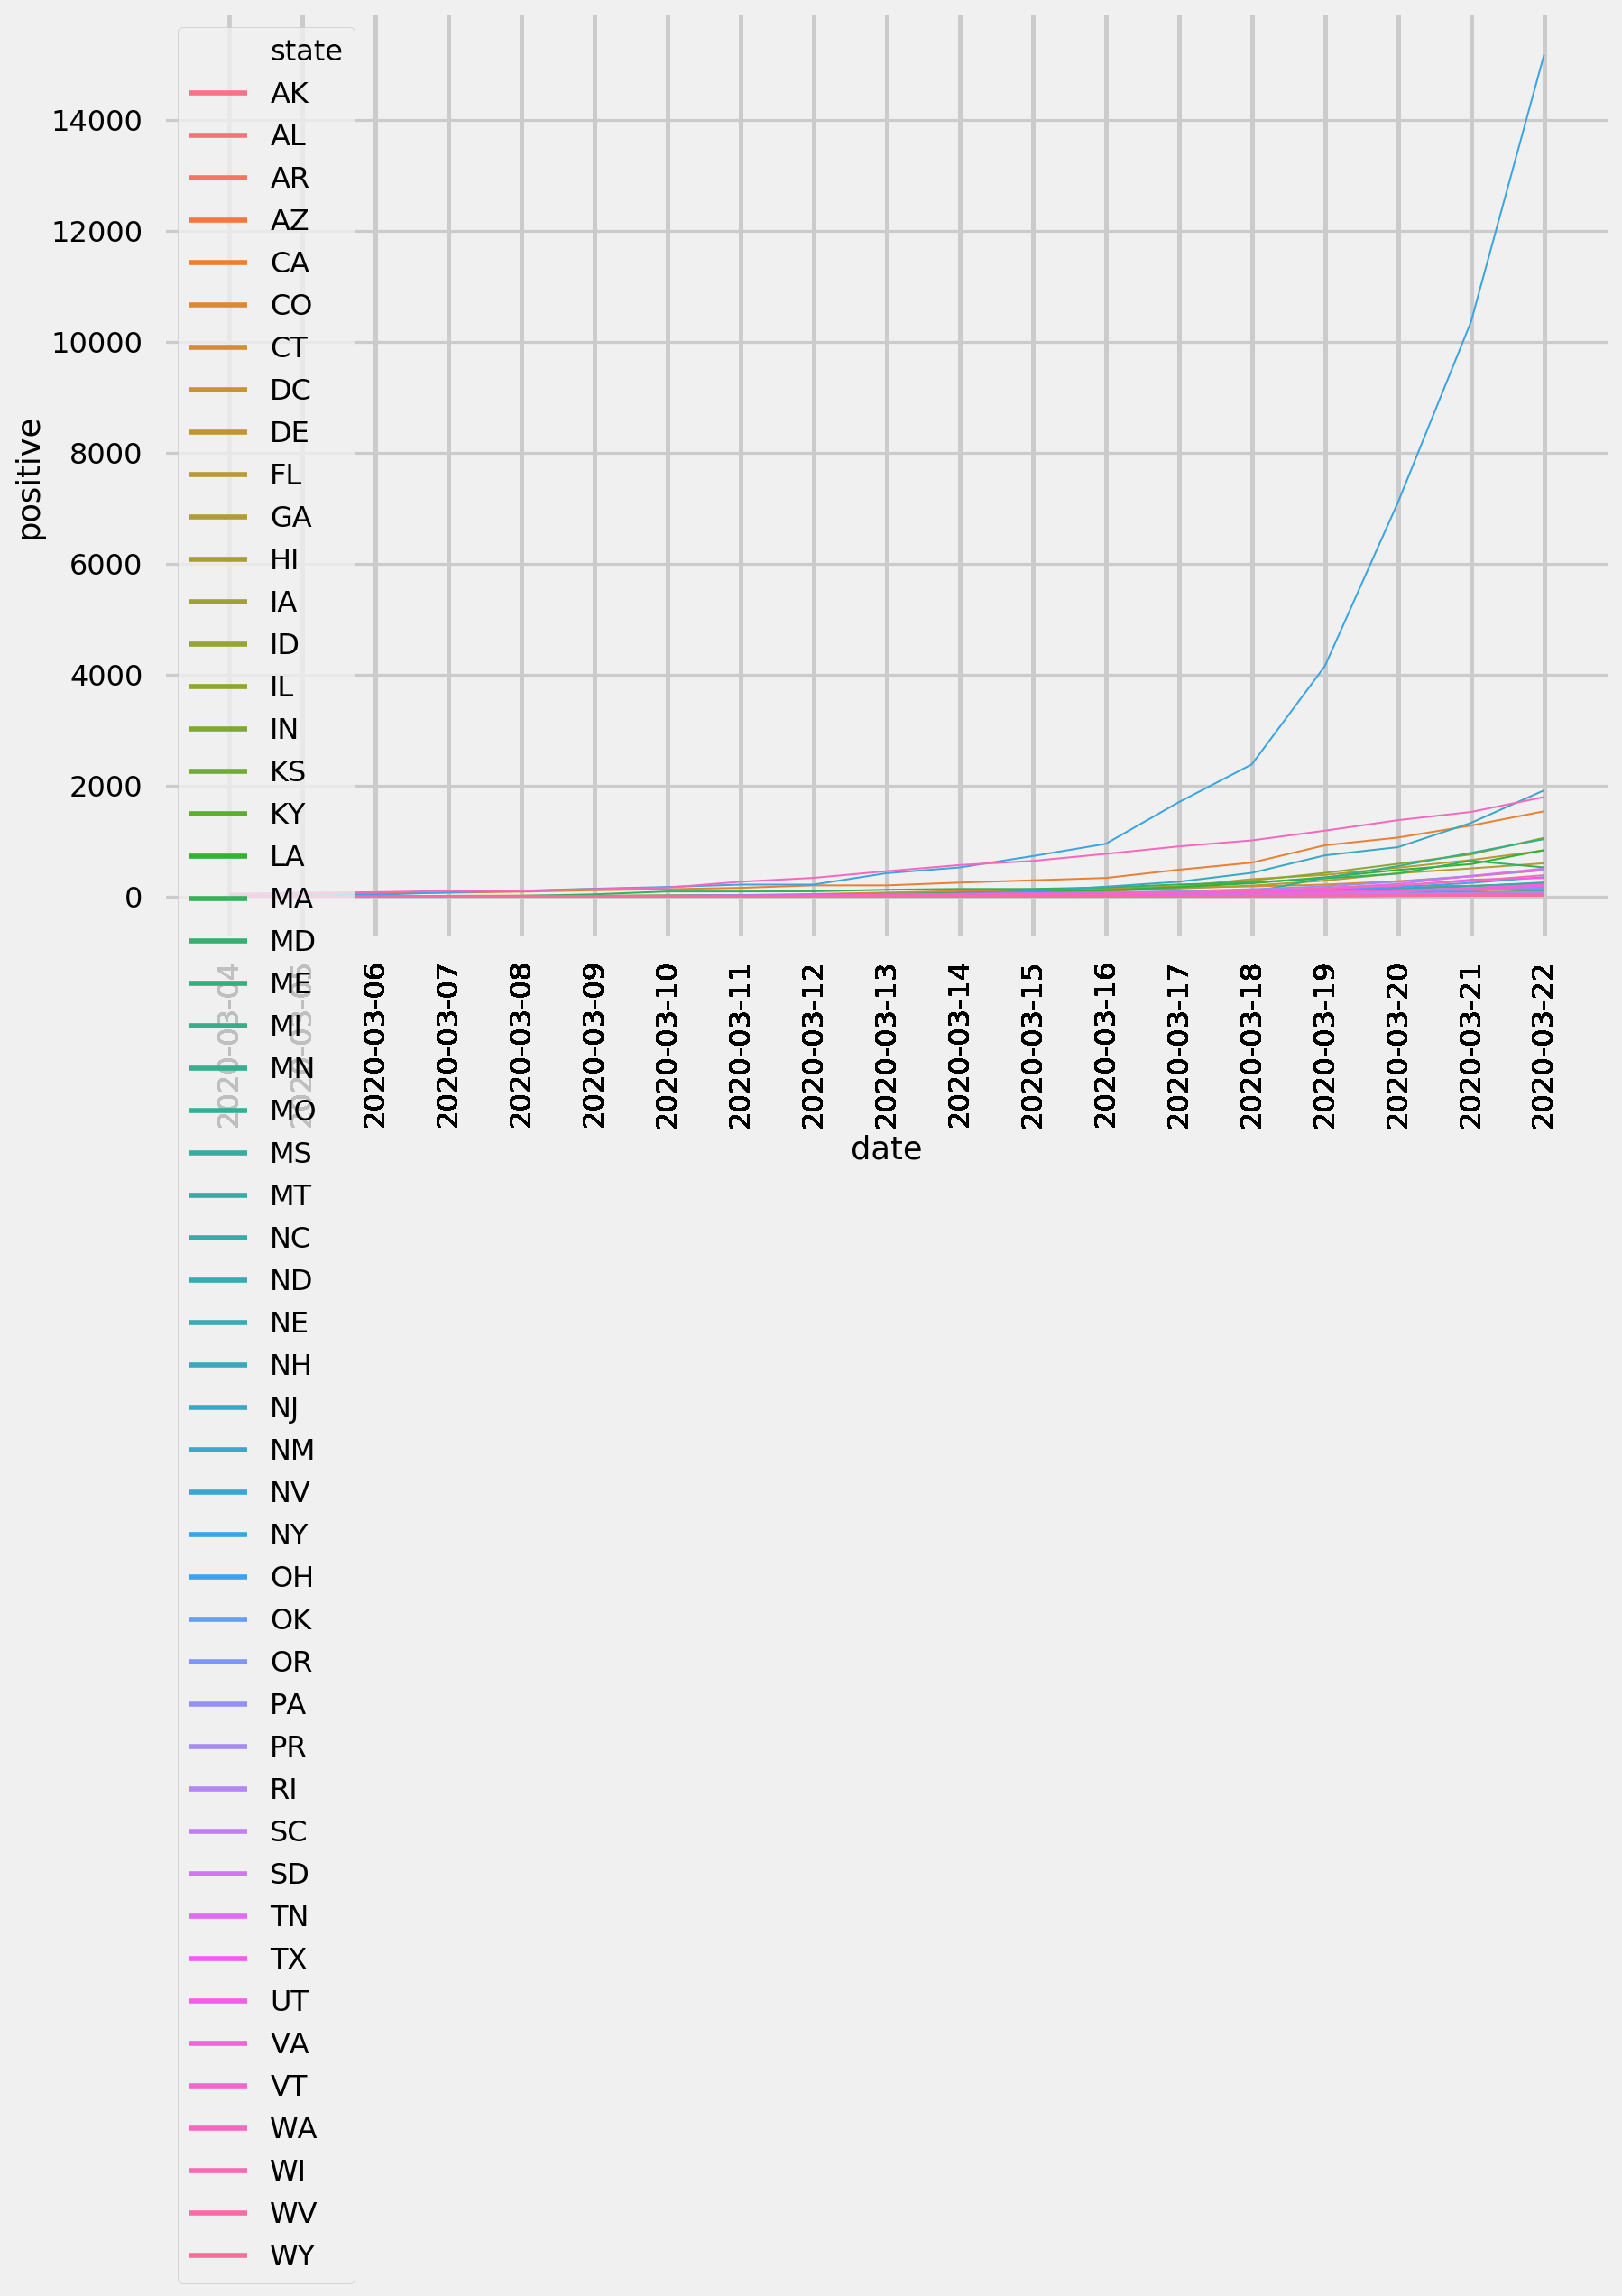

In [18]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_states)
ax.set(xticks=df_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top 10 States

In [19]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(5).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'WA', 'CA', 'IL']

# Top State Positive Cases

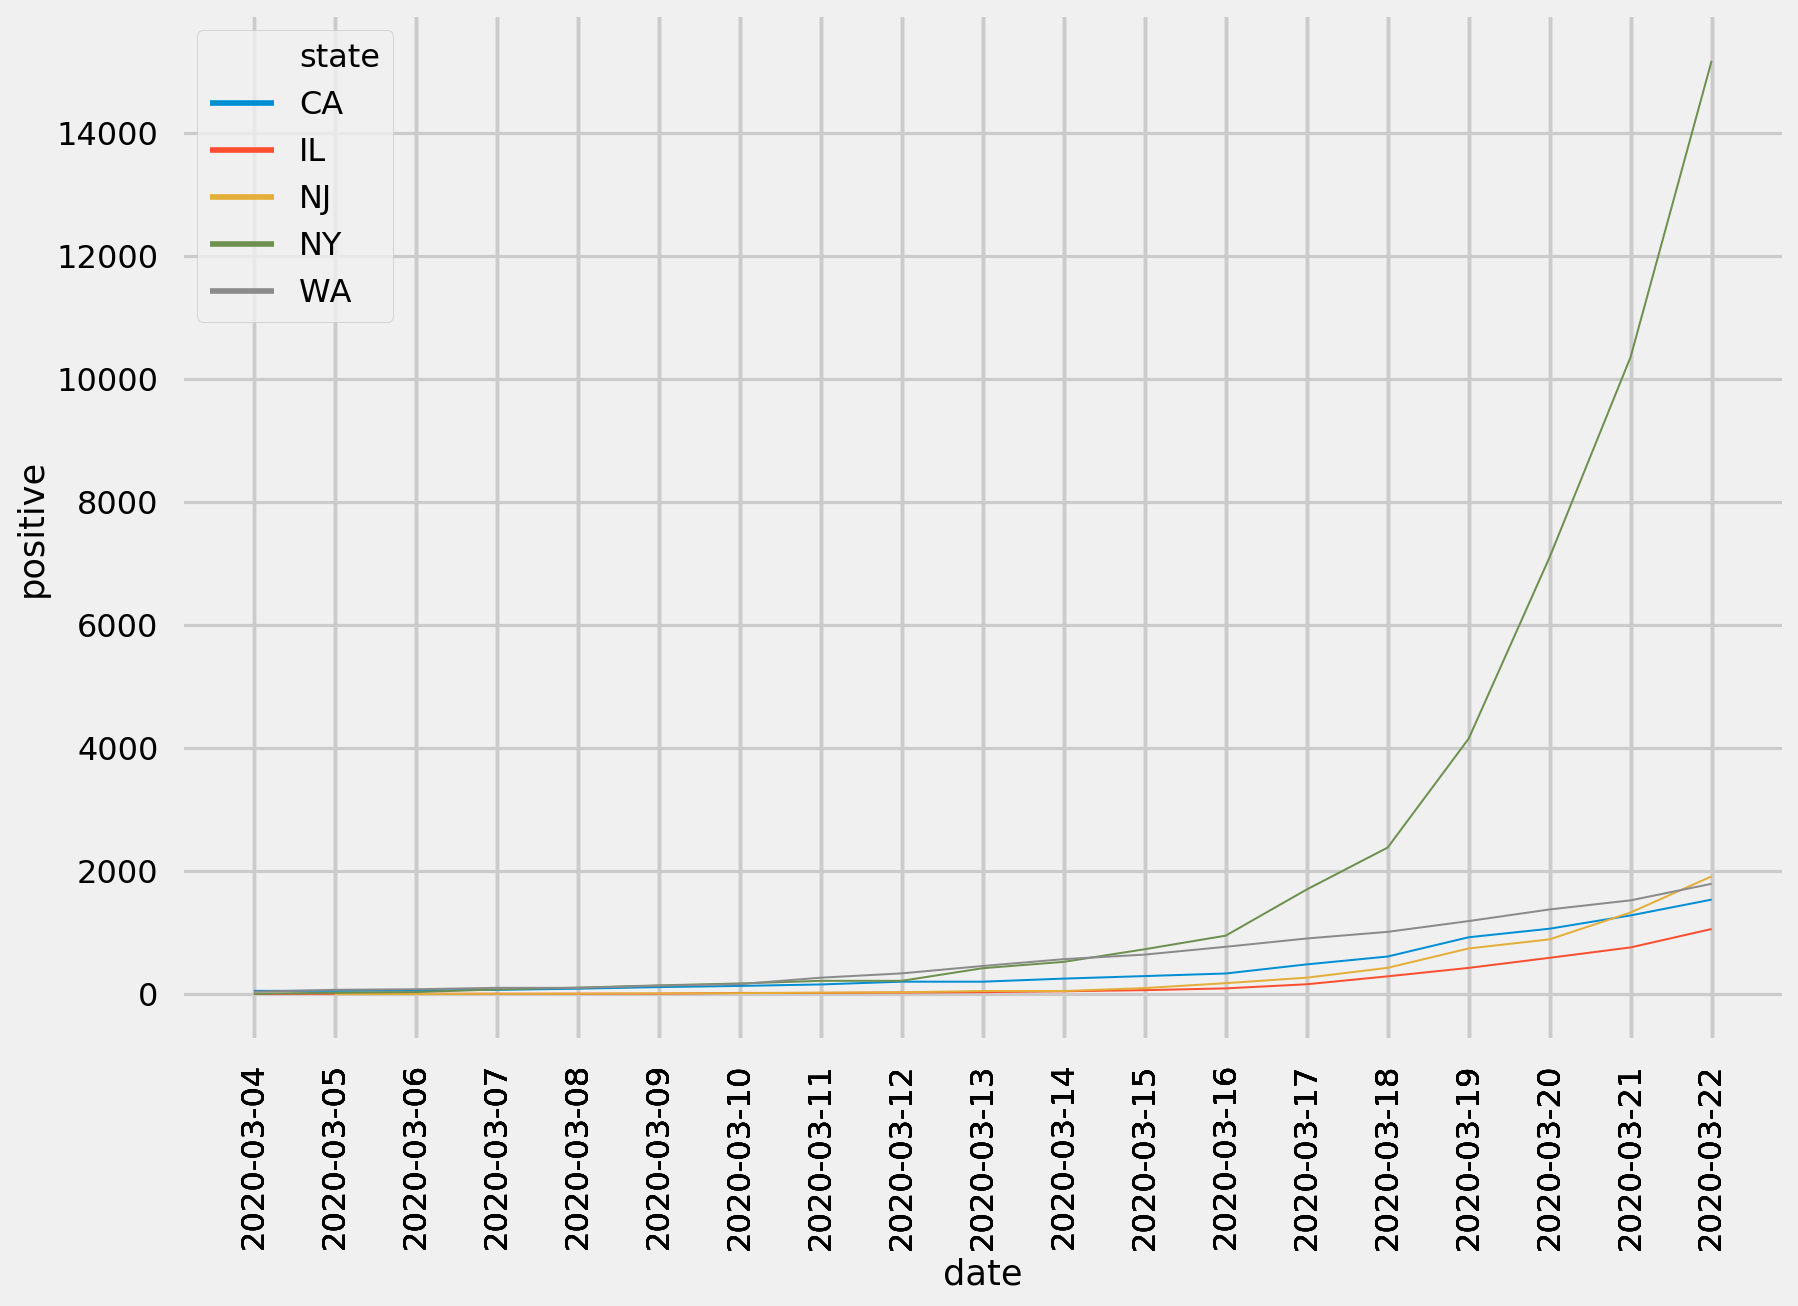

In [20]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases (Log Scale)

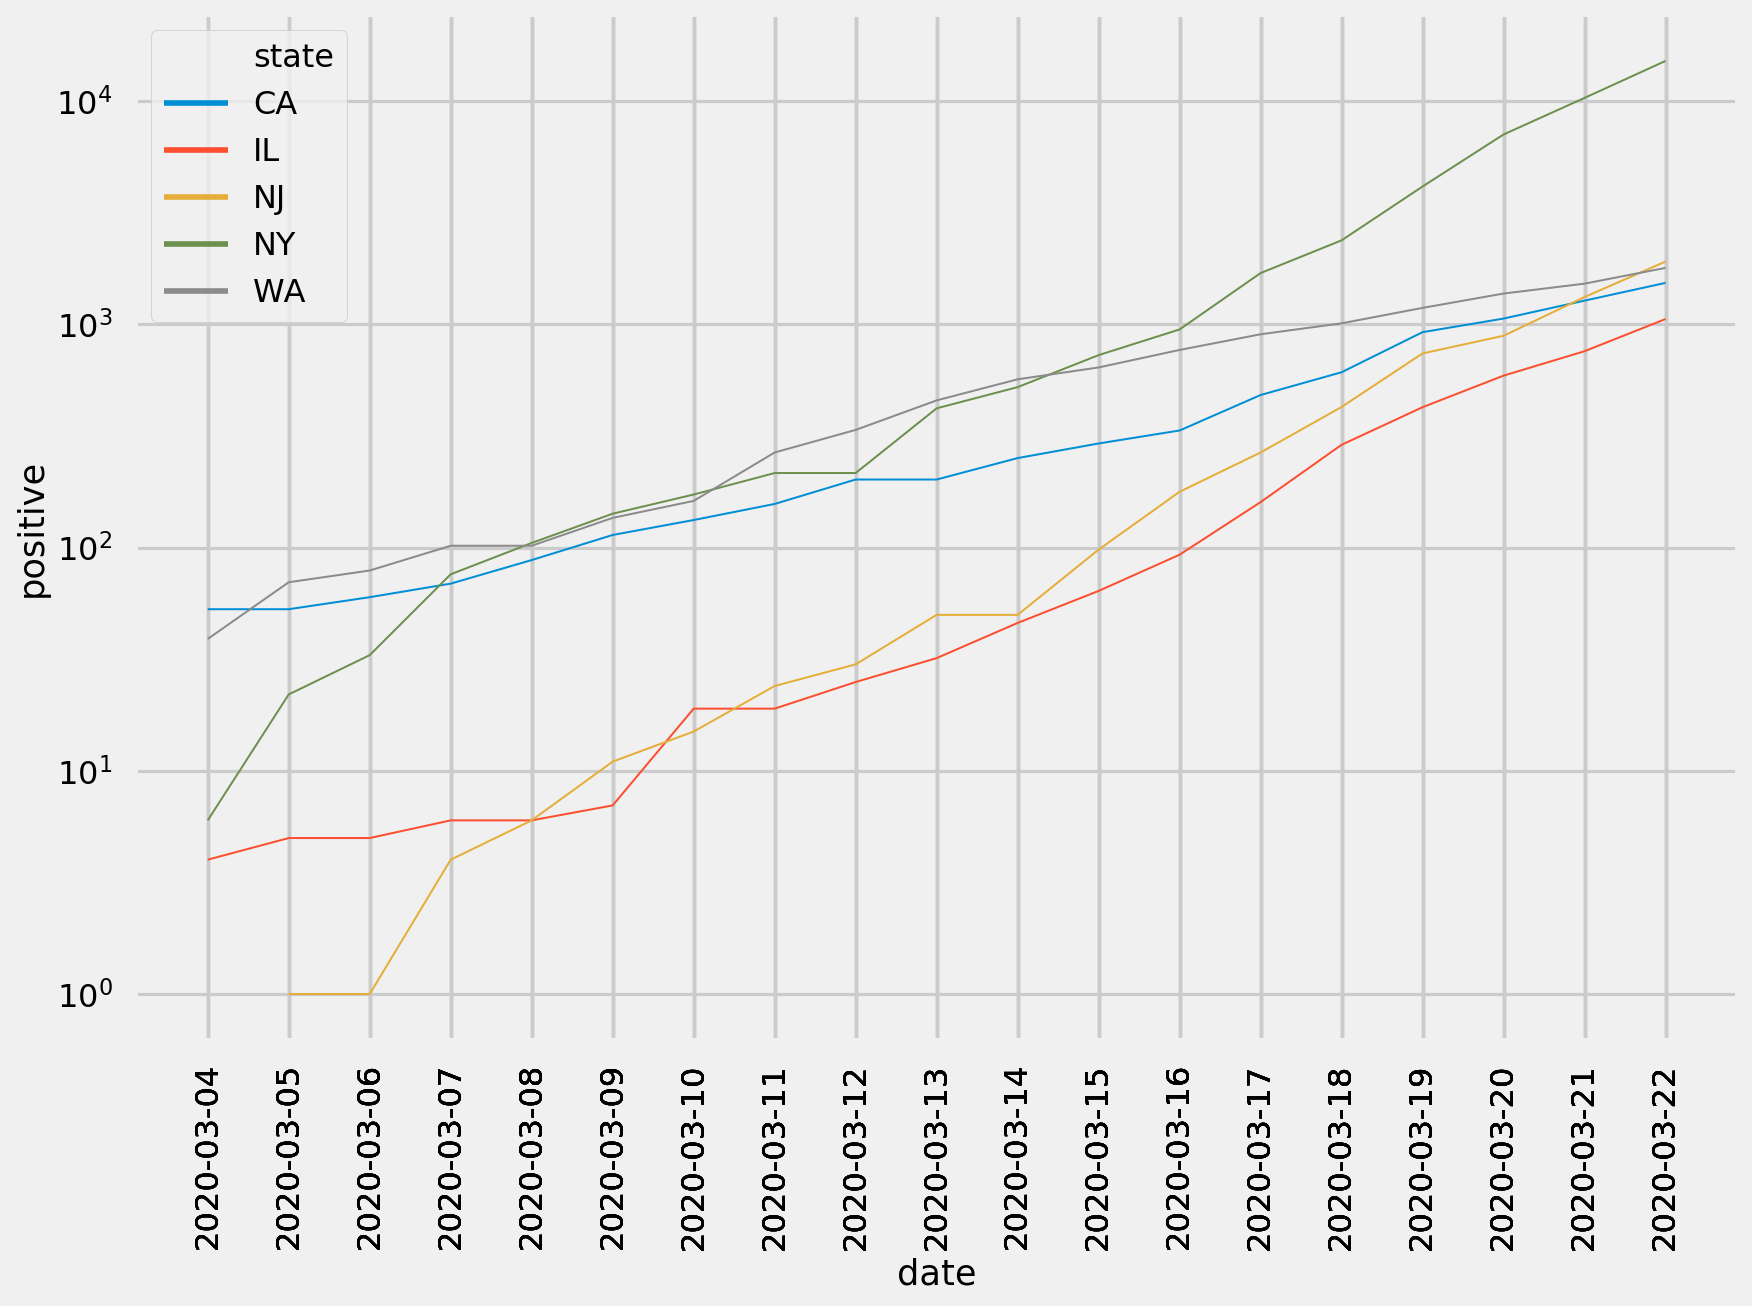

In [21]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population

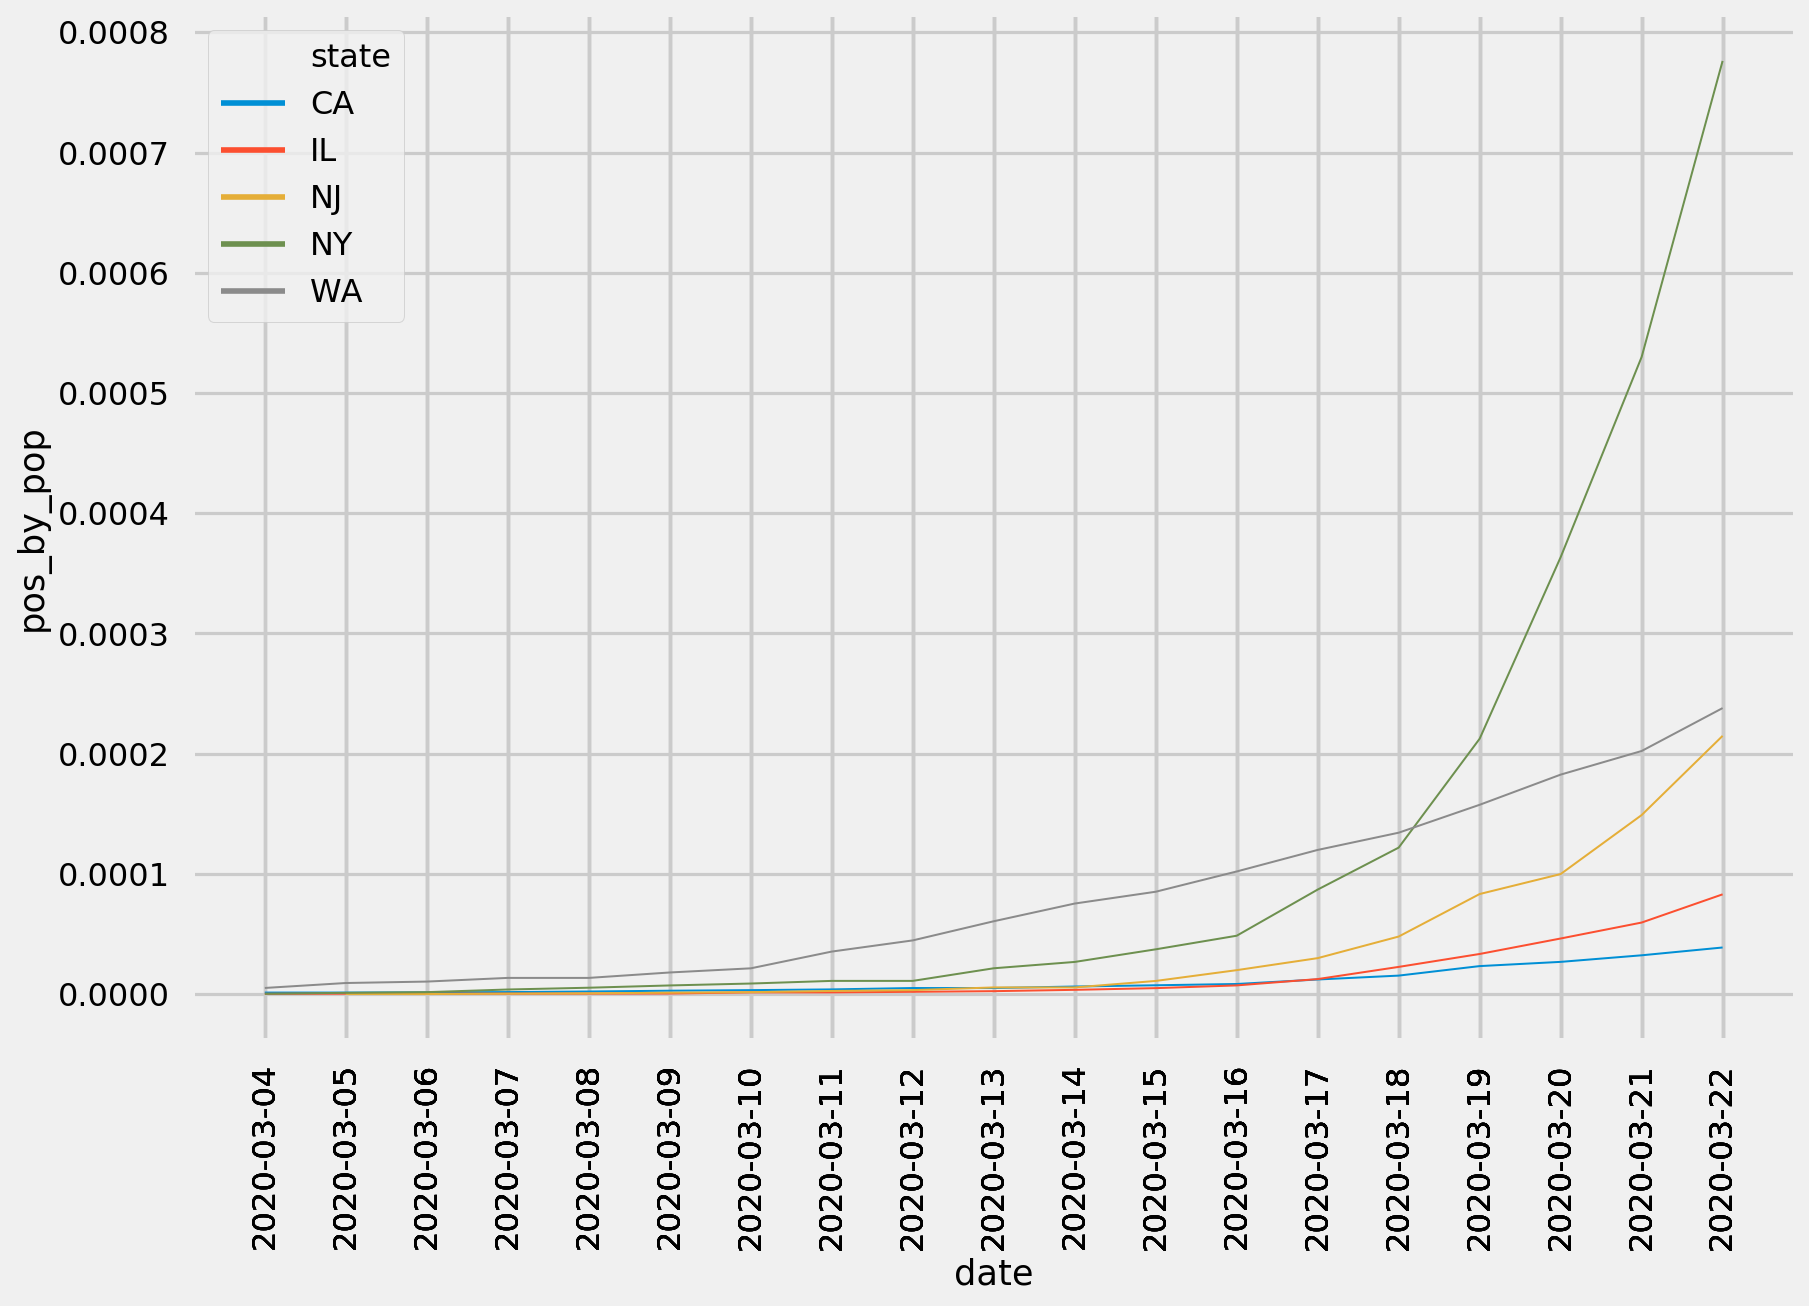

In [22]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

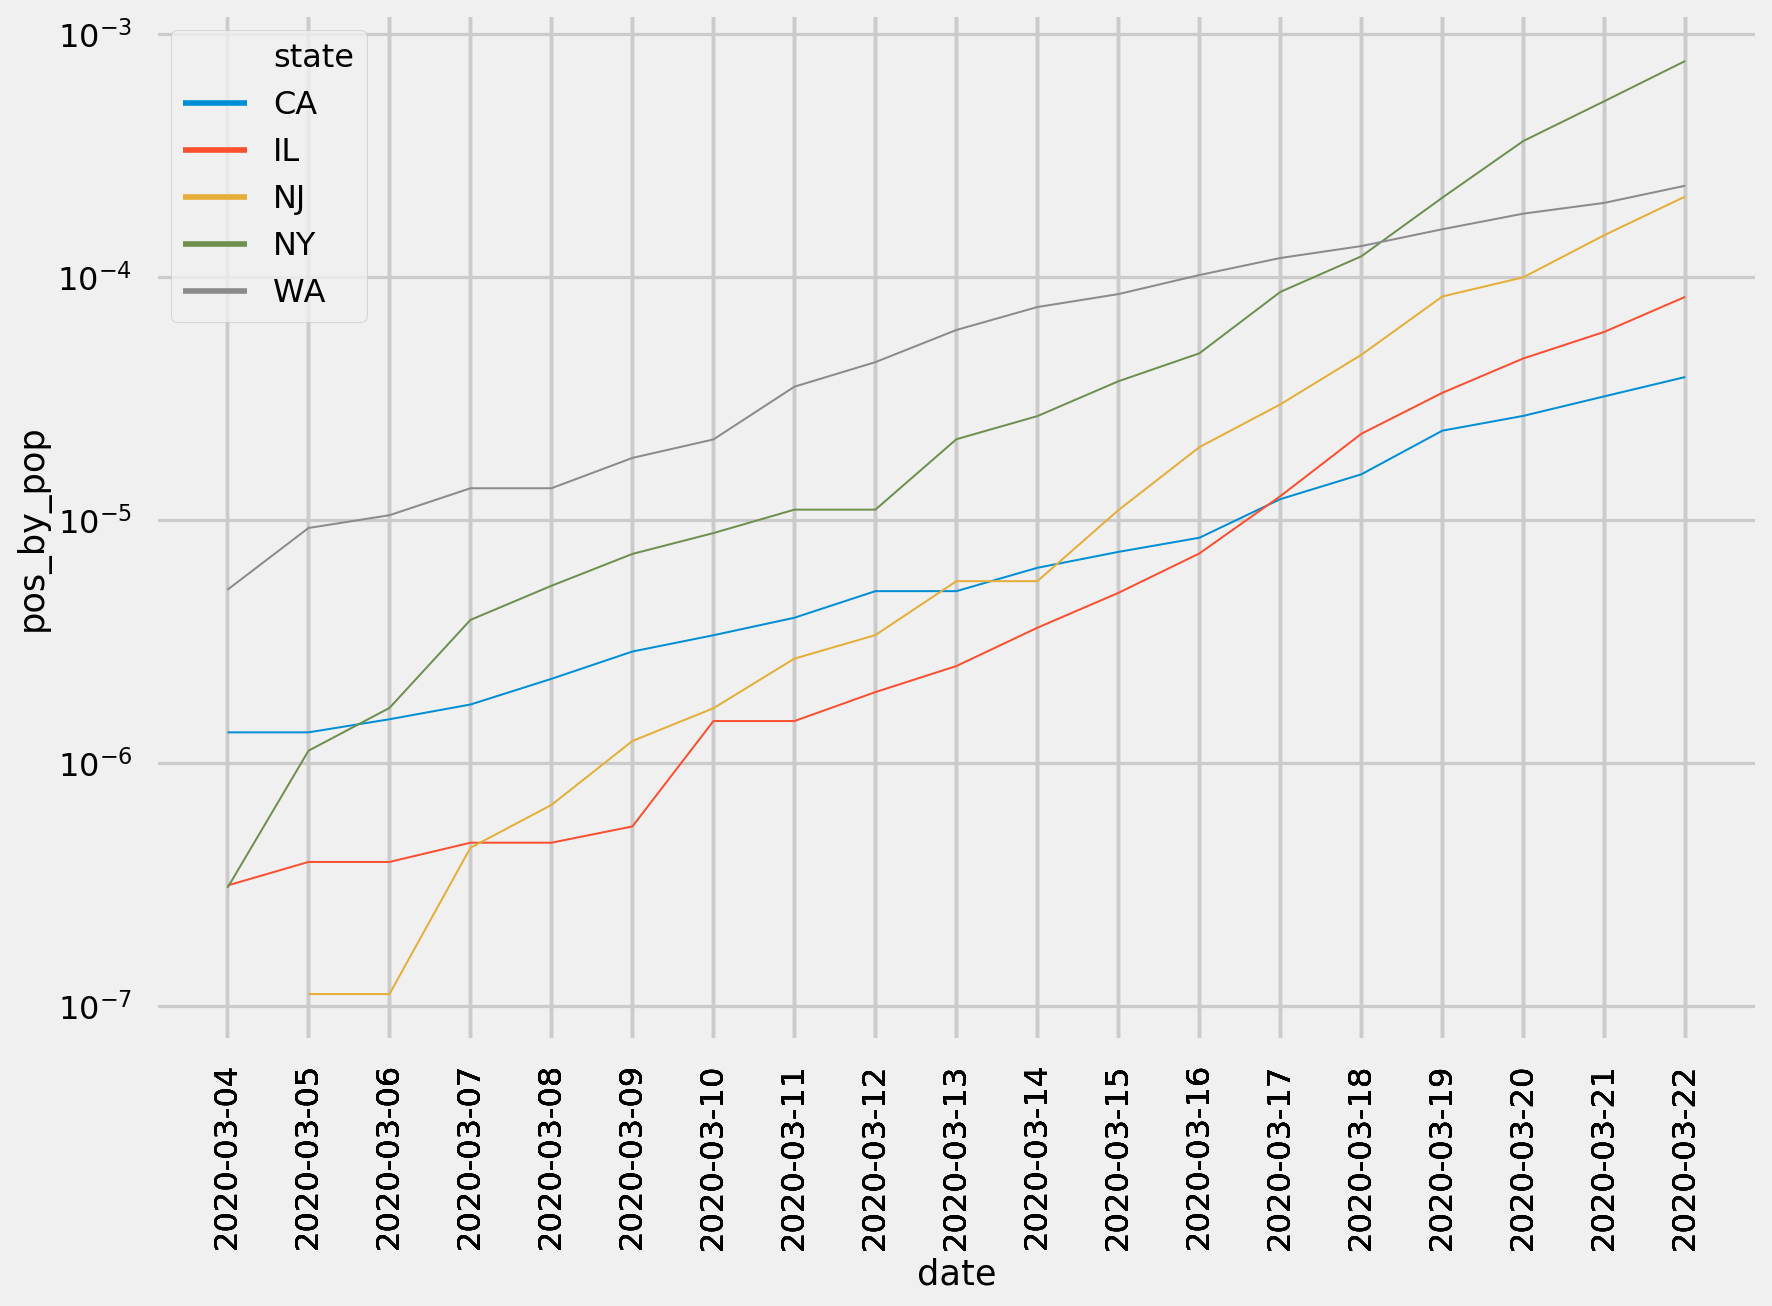

In [23]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Percentage of Population Tested

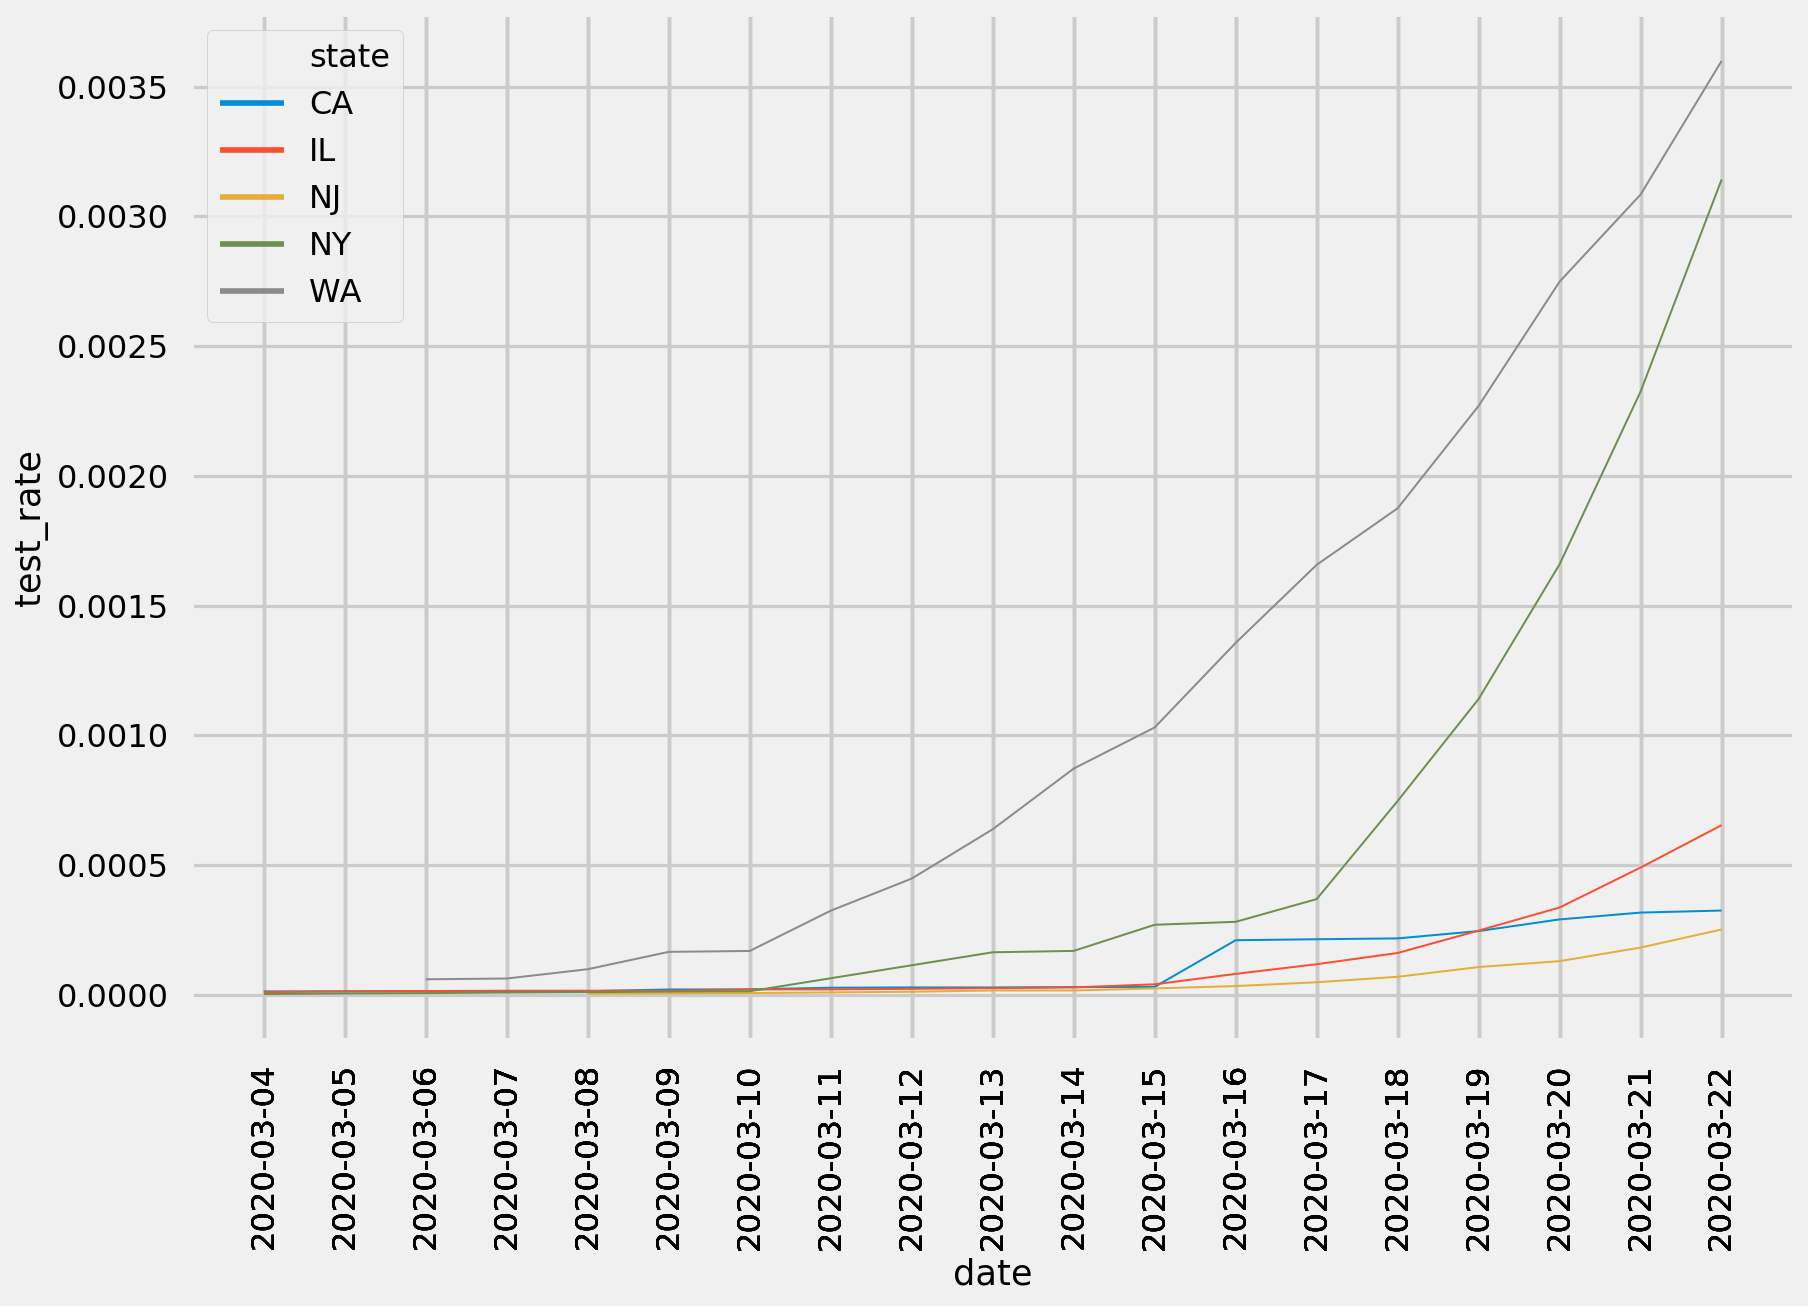

In [24]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()

# Positive Rate

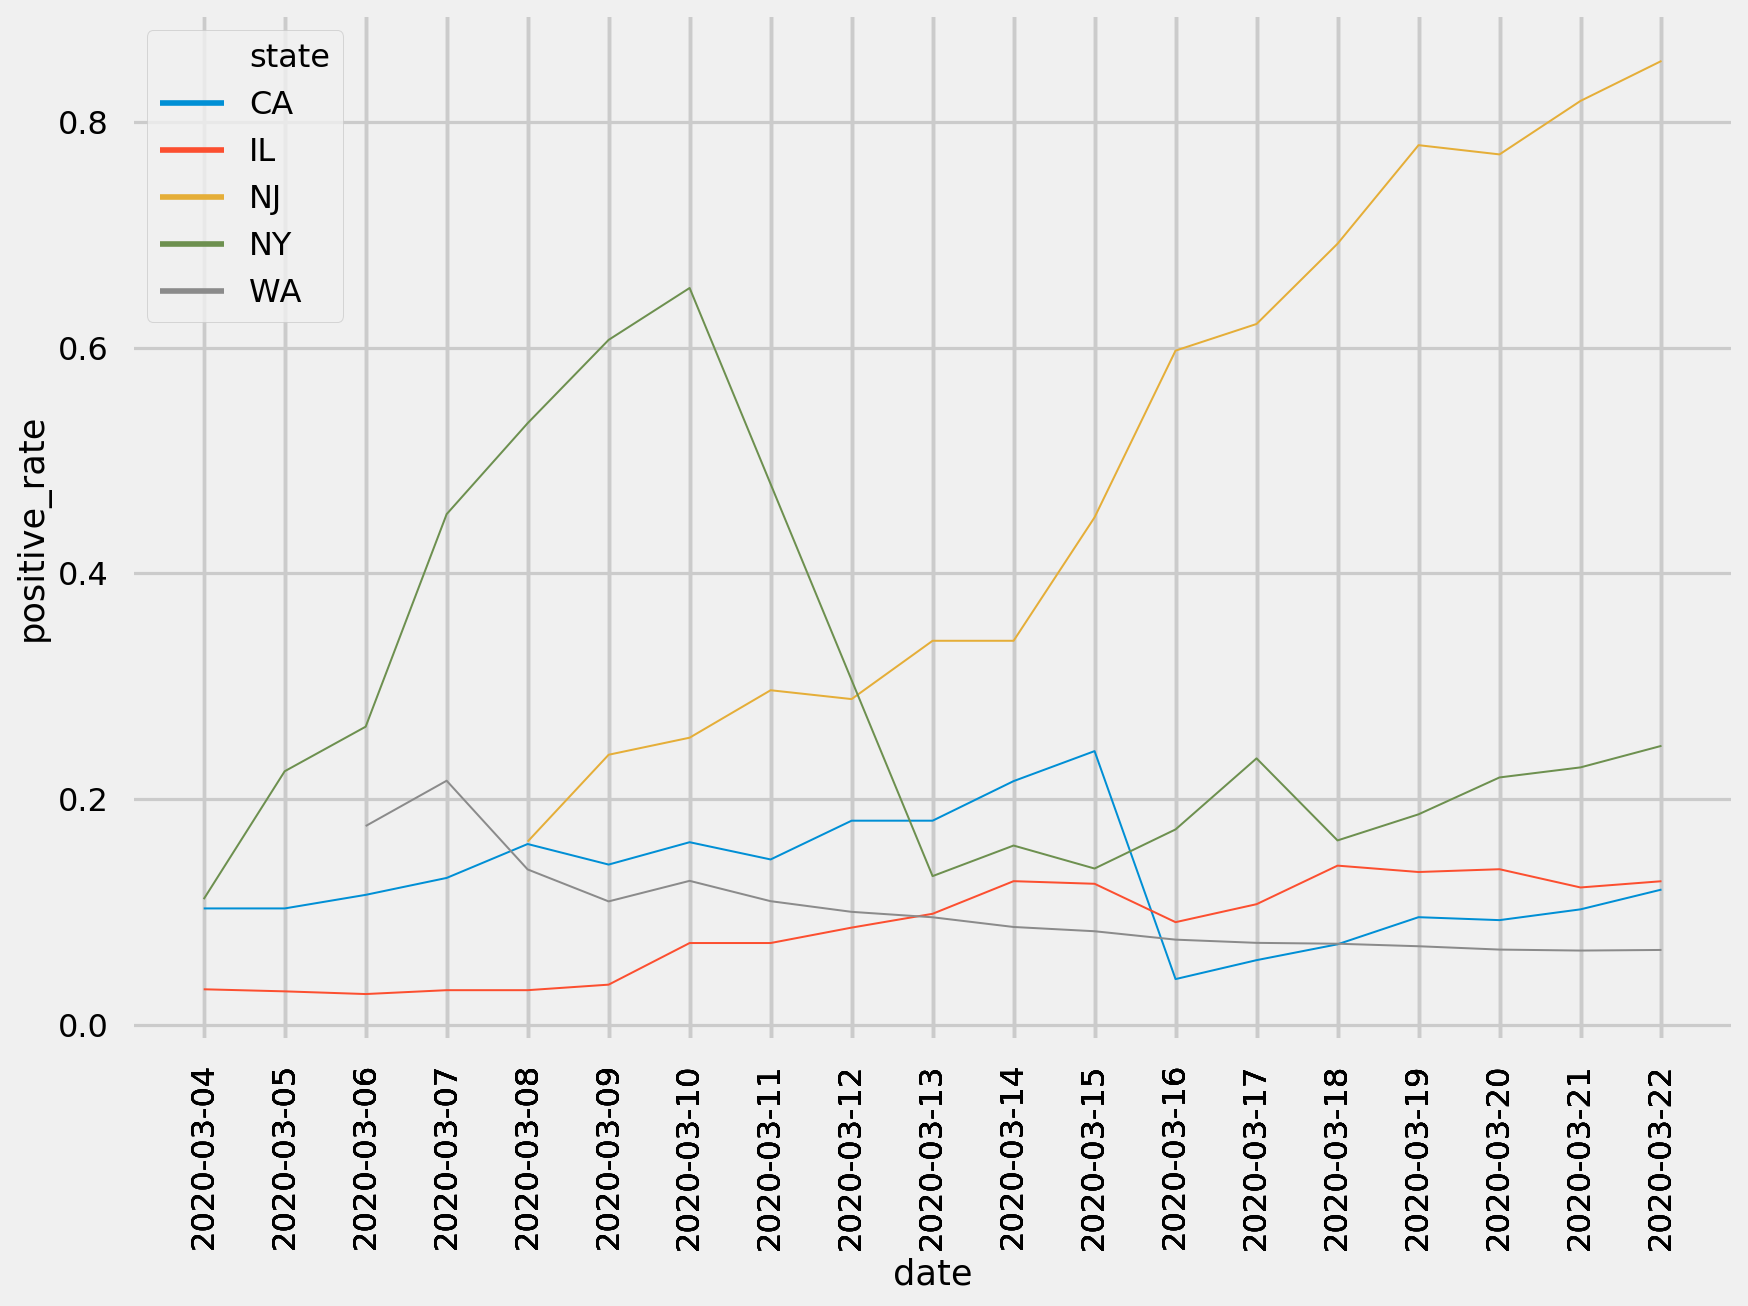

In [25]:
ax = sns.lineplot(x="date", y="positive_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
plt.xticks(rotation=90)
plt.show()